In [1]:
from tensorflow import keras
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

import pandas as pd 
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import plotly 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#reading the
training = pd.read_csv(r'training.csv', header = 0)
display(training)

,A,B,C,D,E,OUTPUT
0,1,1,1,0,0,1
1,1,1,1,0,1,1
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,1,0,0,1
5,0,0,1,0,1,1
6,0,0,1,1,0,1
7,0,0,1,1,1,1
8,0,1,0,0,0,0
9,0,1,0,0,1,0


In [3]:
#splitting the training set into data and target
training_arr = training.values
data_input = training_arr[:,0:5]
data_output = training_arr[:,5]

# Splitting the data into a training set and a test set
testing_set_size = 0.2

input_train, input_test, output_train, output_test = train_test_split(
data_input, data_output, test_size=testing_set_size, random_state=0)


In [4]:
#creating the keras model with 2 hidden layers with 3 and 2 nodes on each
model = Sequential()
model.add(Dense(4, input_shape=(5,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:


# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fitting the model to the dataset we got
history = model.fit(input_train, output_train, validation_split=0.2, epochs=100,batch_size=5)

# evaluate the model and print out the accuracy 
_, accuracy = model.evaluate(input_test, output_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
3/3 [==============================] - 1s 206ms/step - loss: 0.5567 - accuracy: 0.7333 - val_loss: 0.4134 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5541 - accuracy: 0.7333 - val_loss: 0.4110 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5520 - accuracy: 0.7333 - val_loss: 0.4096 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5502 - accuracy: 0.7333 - val_loss: 0.4076 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5482 - accuracy: 0.7333 - val_loss: 0.4051 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5472 - accuracy: 0.7333 - val_loss: 0.4017 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5452 - accuracy: 0.7333 - val_loss: 0.3993 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 37ms/step - loss: 0.4847 - accuracy: 0.7333 - val_loss: 0.3092 - val_accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 37ms/step - loss: 0.4838 - accuracy: 0.7333 - val_loss: 0.3078 - val_accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 35ms/step - loss: 0.4828 - accuracy: 0.7333 - val_loss: 0.3067 - val_accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 36ms/step - loss: 0.4820 - accuracy: 0.7333 - val_loss: 0.3058 - val_accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 36ms/step - loss: 0.4811 - accuracy: 0.7333 - val_loss: 0.3048 - val_accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 40ms/step - loss: 0.4802 - accuracy: 0.7333 - val_loss: 0.3034 - val_accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 38ms/step - loss: 0.4793 - accuracy: 0.7333 - val_loss: 0.3025 - val_accuracy: 1.0000
Epoch 66/100
3/3 [========

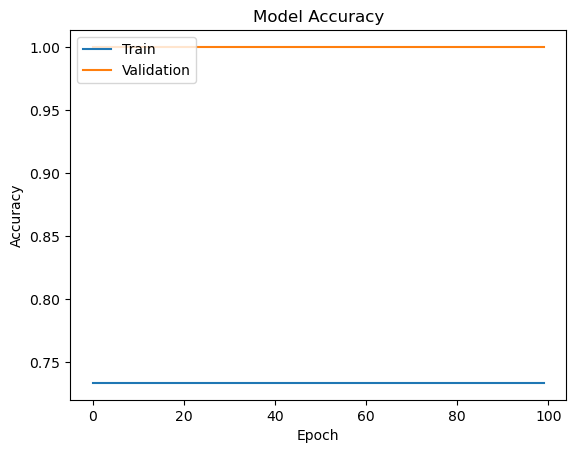

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

In [42]:
test = pd.read_csv(r'test.csv', header = 0)
display(test)

,A,B,C,D,E,OUTPUT
0,1,1,0,0,0,1
1,1,1,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,1,1,0,1,0,1
5,1,1,0,1,1,1
6,1,1,1,1,0,1
7,1,1,1,1,1,1


In [43]:
test_arr = test.values
test_input = test_arr[:,0:5]
test_output = test_arr[:,5]


# evaluate the keras model
_, accuracy = model.evaluate(test_input, test_output)
print('Accuracy: %.2f' % (accuracy*100))


1/1 [==============================] - 0s 28ms/step - loss: 0.6220 - accuracy: 0.7500
Accuracy: 75.00


How many hidden layers have you used? And why?
 - We used 2 hidden layers.
 - The data set, that we have, contains only 5 features. Since it has fewer deatures, it is better to go with 1 or 2 hidden layer.
 - Also, we need to remember that using more hidden layer will increase the complexity of the model
 
How many nodes in each hidden layer and why that number of nodes in particular?
 - the number of nodes in the input layer is the same as the number of features the data has. So in our case, we have 5 nodes in the input layer.
 - Since the data is in binary, we decided to use the 'binary_crossentropy' cassification. In this case we'll want to use 2 nodes for the output, but that's not necessary since one of them has all weights equal to 0 and the output will always equal to 0 aswell. So using 1 node for the output make more sense. 
 - there are multiple way to find how many nodes to uses in eash hidden layer. The one we decided to go with is 'The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.'
 - 5*2/3 +1 = 4.33333 
 - we rounded down to 4 for the first hidden layer
 - for the second one hidden layer, we decided to go with 2 nodes, because the first node will connect with 2 nodes of the first hidden layer and the second node will connect with other 2 nodes of the first hidden layer
 
What is the activation function that you used and why? Did you use the same activation function in all layers? Why?
 - for the output layer, we used Sigmoid. Since we are using only one node for the output layer for the reason we explain above, we used Sigmoid with the output node in the place of softmax, because it will update faster. 
 - for the two hidden layer, we used ReLU, because is the defaul activation function for the hidden layer and also it is less susceptible to vanishing gradients that prevent deep models from being trained 
 
What learning algorithm did you use to train the neural net and why?
- for our datase, it make sense to chose between 'binary classification' and 'multiclass classification'. Since both will result with the same outcome of 1 or 0 it is better to go with 'binary classification'. 

Can you use one hidden layer only to solve this problem? If yes, how many nodes are you going to have in it? And why?
- yes. Since our dataset is really a simple one with only 5 features, there won't be any problem by using only one hidden layer. The number of nodes to be used in this hidden layer will be the mean between the input layer and the output layer. 

- input layer = 5
- output layer = 1
- 5+1 = 6
- 6/2 = 3
 
 - The number of nodes for this hidden layer will be 3
 - Using less nodes will lead to underfitting and using more nodes will lead to overfitting

Can we use 5 hidden layers? Is that a good idea? Justify your answer.
- It is possible to use 5 hidden layers, but it will not be a good idea. Using more then necessary hidden layer will cause the model to overfitting with the trainning dataset. This will cause the accuracy of the test dataset to decrease, because the model is overfitted it won't be able to generalize the new unseen data. 

How did the neural net do in classifying the testing set? Comment on how good or bad it learned the function from the training set.
- 